
<h1 style="text-align: center; background-color:  #003d99; opacity: 0.7; padding: 30px; color: white; border-radius: 8px; border-left: 6px solid red">  Aula 7 - Opendap - Hycom - Xarray - QuiverPlot</h1>
<a id='section_id1'></a>


---

# Índice

[**Aula 7 - Opendap - Hycom - Xarray - QuiverPlot**](#section_id1)
- [1. Opendap](#section_id2)
- [2. Plots](#section_id3)
    - [2.1. Quiver Plot](#section_id4)
    - [2.2. Subplots](#section_id5)




# 1. Opendap

<a id='section_id2
       '></a>


O objetivo dessa aula é:

1. apresentar um dos protocolos de acesso de dados online mais comuns para oceanografia. O OPeNDAP (Open Source Project for a Network Data Access Protocol) foi desenvovido em 2000 e é responsavel por avanços no compartilhamento de dados oceanográficos. 

2. Exercitar a manipulação de datas em arquivos netcdf.

3. Elaborar mapa com plot de vetores.

4. Exercitar estruturas de repetição. 




O Opendap é basicamente uma forma de acesso de dados via web. Os dados geralmente estão organizados em formato netCDF4 $\rightarrow$ [**Aula5**](https://github.com/calixtops/OEPY/blob/main/Notebooks/OEPY%20-%20Aula%2005%20-%20Arquivos%20NetCDF%20%2B%20Xarray%20%2B%20Cartopy.ipynb). Para exemplificar, utilizaremos os dados do consórcio [**Simple Ocean Data Assimilation(SODA)**](http://apdrc.soest.hawaii.edu/datadoc/soda_3.3.1.php).

Para acessar os dados via Opendap, utilizamos um link que pode ser acessado no site do [<em>Asia-Pacific Data-Researcher Center](http://apdrc.soest.hawaii.edu/data/data.php). Para isso, utilizaremos a bilioteca Xarray.


In [1]:
import xarray as xr
import cartopy as cp
import matplotlib.pyplot as plt
from cmocean import cm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Utilizaremos a versão SODA v3.3.1 monthly means.

In [2]:
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/SODA/soda_3.3.1/monthly'

In [3]:
dado = xr.open_dataset(url)

In [4]:
dado

<xarray.Dataset>
Dimensions:  (lat: 330, lev: 50, lon: 720, time: 432)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-15 1980-02-15 ... 2015-12-15
  * lev      (lev) float64 5.034 15.1 25.22 ... 4.975e+03 5.185e+03 5.395e+03
  * lat      (lat) float64 -74.75 -74.25 -73.75 -73.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Data variables: (12/15)
    temp     (time, lev, lat, lon) float32 ...
    salt     (time, lev, lat, lon) float32 ...
    wt       (time, lev, lat, lon) float32 ...
    ssh      (time, lat, lon) float32 ...
    mlt      (time, lat, lon) float32 ...
    mlp      (time, lat, lon) float32 ...
    ...       ...
    sft      (time, lat, lon) float32 ...
    prho     (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    taux     (time, lat, lon) float32 ...
    tauy     (time, lat, lon) float32 ...
Attributes:
    title:          SODA v3.3.1 monthly means
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/soda_3.3.1.php
    history:        Wed Feb 10 14:34:42 HST 2021 : imported by GrADS Data Ser...

<div class="alert alert-block alert-danger">Uma das dificuldades de trabalhar com esse tipo de dados é que, algumas vezes, não há muito controle quando a quantidade de dados que estamos carregando. No caso, temos dimensions(sizes): lat:330, lev: 50, lon: 720, time: 432. Temos um dado com dimensões de tamanho grande o que pode sobrecarregar a capacidade computacional que temos. Para isso realizamos uma seleção do dado conforme o objetivo.</div>

No caso, selecionaremos o ano de 2013 e a região geográfica referente ao Atlântico Sul.

**Observe como é simples trabalhar com datas utilizando o Xarray**

In [5]:
dado.sel(time=slice("2009-01-01","2009-12-26"),
          lat=slice(-50,5),lon=slice(300,360))

<xarray.Dataset>
Dimensions:  (lat: 110, lev: 50, lon: 120, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2009-01-15 2009-02-15 ... 2009-12-15
  * lev      (lev) float64 5.034 15.1 25.22 ... 4.975e+03 5.185e+03 5.395e+03
  * lat      (lat) float64 -49.75 -49.25 -48.75 -48.25 ... 3.25 3.75 4.25 4.75
  * lon      (lon) float64 300.2 300.8 301.2 301.8 ... 358.2 358.8 359.2 359.8
Data variables: (12/15)
    temp     (time, lev, lat, lon) float32 ...
    salt     (time, lev, lat, lon) float32 ...
    wt       (time, lev, lat, lon) float32 ...
    ssh      (time, lat, lon) float32 ...
    mlt      (time, lat, lon) float32 ...
    mlp      (time, lat, lon) float32 ...
    ...       ...
    sft      (time, lat, lon) float32 ...
    prho     (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    taux     (time, lat, lon) float32 ...
    tauy     (time, lat, lon) float32 ...
Attributes:
    title:          SODA v3.3.1 monthly means
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/datadoc/soda_3.3.1.php
    history:        Wed Feb 10 14:34:42 HST 2021 : imported by GrADS Data Ser...

In [6]:
dado = dado.sel(time=slice("2009-01-01","2010-01-01"),
          lat=slice(-50,5),lon=slice(300,360))

Após realizar o <em>subset</em> do nosso dado podemos explorar melhor as váriaveis. Temos um total de 15 variáveis: <br>

* temp(time, lev, lat, lon)float32
* salt(time, lev, lat, lon)float32
* wt(time, lev, lat, lon)float32
* ssh(time, lat, lon)float32
* mlt(time, lat, lon)float32
* mlp(time, lat, lon)float32
* mls(time, lat, lon)float32
* anompb(time, lat, lon)float32
* nh(time, lat, lon)float32
* sft(time, lat, lon)float32
* prho(time, lev, lat, lon)float32
* u(time, lev, lat, lon)float32
* v(time, lev, lat, lon)float32
* taux(time, lat, lon)float32
* tauy(time, lat, lon)float32

Como queremos fazer um plot de vetor, utilizaremos somente as variaveis U e V.

In [7]:
dado.u

<xarray.DataArray 'u' (time: 12, lev: 50, lat: 110, lon: 120)>
[7920000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2009-01-15 2009-02-15 ... 2009-12-15
  * lev      (lev) float64 5.034 15.1 25.22 ... 4.975e+03 5.185e+03 5.395e+03
  * lat      (lat) float64 -49.75 -49.25 -48.75 -48.25 ... 3.25 3.75 4.25 4.75
  * lon      (lon) float64 300.2 300.8 301.2 301.8 ... 358.2 358.8 359.2 359.8
Attributes:
    long_name:  zonal velocity [m/s]

In [8]:
dado.v

<xarray.DataArray 'v' (time: 12, lev: 50, lat: 110, lon: 120)>
[7920000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2009-01-15 2009-02-15 ... 2009-12-15
  * lev      (lev) float64 5.034 15.1 25.22 ... 4.975e+03 5.185e+03 5.395e+03
  * lat      (lat) float64 -49.75 -49.25 -48.75 -48.25 ... 3.25 3.75 4.25 4.75
  * lon      (lon) float64 300.2 300.8 301.2 301.8 ... 358.2 358.8 359.2 359.8
Attributes:
    long_name:  meridional velocity [m/s]

Para realizar o plot de velocidade, utilizaremos a função [**quiver()**](http://xarray.pydata.org/en/latest/generated/xarray.Dataset.plot.quiver.html) do xarray.

# 2. Plots

<a id='section_id3'></a>


Faremos um plot de temperatura para calibrar as nossas habilidades com a confecção de mapas preenchidos por variáveis escalares.

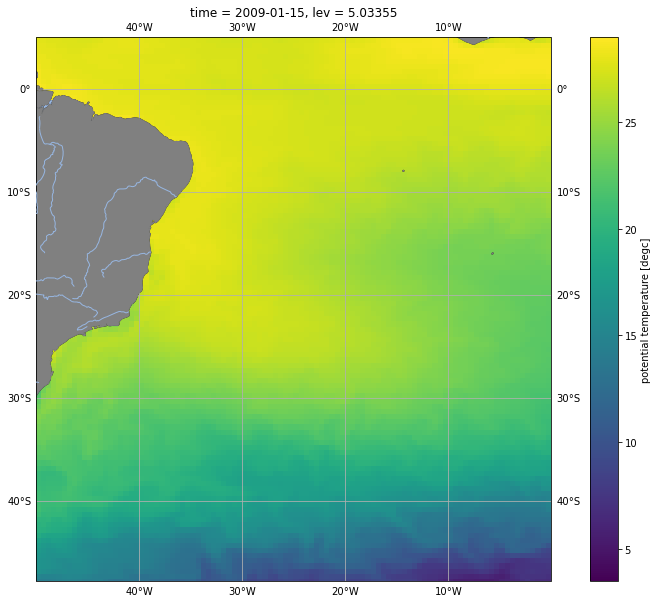

In [9]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=cp.crs.PlateCarree())

dado.temp.isel(time=0,lev=0).plot(ax = ax,transform=cp.crs.PlateCarree())

ax.add_feature(cp.feature.LAND,zorder = 2, color = '0.5')
ax.add_feature(cp.feature.OCEAN)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS, linestyle=':')
ax.add_feature(cp.feature.LAKES,zorder = 3, alpha=0.5)
ax.add_feature(cp.feature.RIVERS, zorder = 3)
ax.gridlines(draw_labels=True)
ax.set_extent([-50, 0, -45, 5])

## 2.1 Quiver Plot
<a id='section_id4'></a>


<b>Para o quiver plot, utilizaremos a biblioteca Matplotlib. Selecionaremos os dados u e v para o primeiro level.

In [10]:
u = dado.u[:,0,:,:]
v = dado.v[:,0,:,:]
lat = dado.lat
lon = dado.lon

In [11]:
X,Y = np.meshgrid(lon.values,lat.values)

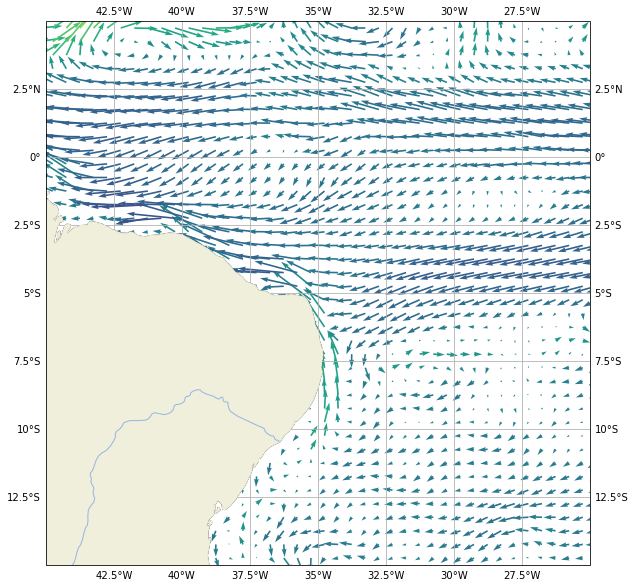

In [12]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=cp.crs.PlateCarree())

n= -2
fancy = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2) # Criando um dado numperico para definir as cores das minhas setas [ Opcional]


ax.quiver(lon,lat,u[0,:,:],v[0,:,:],fancy[0,:,:],
          scale = 7,width=0.003,
          transform=cp.crs.PlateCarree())



ax.add_feature(cp.feature.LAND,zorder = 2)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS, linestyle=':')
ax.add_feature(cp.feature.LAKES,zorder = 3, alpha=0.5)
ax.add_feature(cp.feature.RIVERS, zorder = 3)
ax.gridlines(draw_labels=True)

ax.set_extent([-45, -25, -15, 5])


Podemos aproveitar o valor de Altura da Superfice do Mar(SSH) para fazer um plot de contorno preenchido abaixo dos vetores de velocidade.

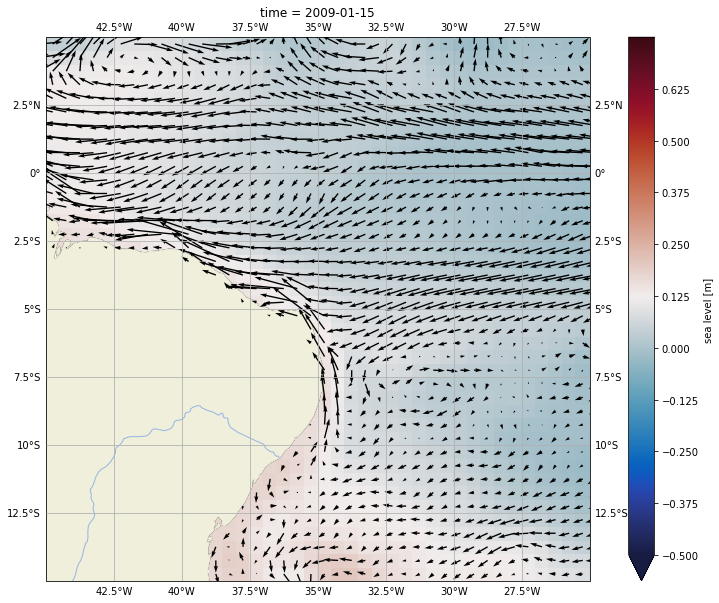

In [13]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=cp.crs.PlateCarree())



ax.quiver(lon,lat,u[0,:,:],v[0,:,:],
          scale = 7,width=0.0025, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=0).plot(ax = ax,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance, levels=np.arange(-.5,.75,0.0001))


ax.add_feature(cp.feature.LAND,zorder = 2)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS, linestyle=':')
ax.add_feature(cp.feature.LAKES,zorder = 3, alpha=0.5)
ax.add_feature(cp.feature.RIVERS, zorder = 3)
ax.gridlines(draw_labels=True,zorder=10)

ax.set_extent([-45, -25, -15, 5])


O atributo  [**zorder**](https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html) é muito útil para organizar a ordem das feições plotadas no mapa

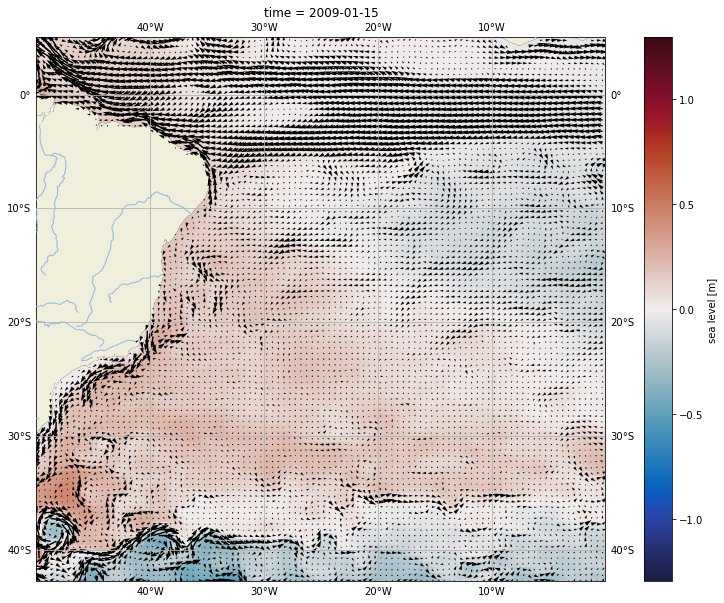

In [14]:
plt.figure(figsize=(14,10))
ax = plt.axes(projection=cp.crs.PlateCarree())



ax.quiver(lon,lat,u[0,:,:],v[0,:,:],
          scale = 18,width=0.0025, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=0).plot(ax = ax,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance)


ax.add_feature(cp.feature.LAND,zorder = 2)
ax.add_feature(cp.feature.COASTLINE)
ax.add_feature(cp.feature.BORDERS, linestyle='-')
ax.add_feature(cp.feature.LAKES,zorder = 3, alpha=0.5)
ax.add_feature(cp.feature.RIVERS, zorder = 3)
ax.gridlines(draw_labels=True,zorder=10)

ax.set_extent([-50, -0, -40, 5])

## 2.2 Subplots
<a id='section_id5'></a>


Podemos exercitar um pouco o subplot confeccionando um painel com plots para os diferentes passos de tempo que possuimos. 

De forma mais simples, podemos utilizar a função [**Subplot**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) para abrir vários eixos e depois plotamos cada um dos subplots. Para facilitar esse processo, vamos definir alguns atributos básicos do nosso mapa em uma função. Posteriormente, faremos plots mais automatizados utilizando a instrução **for**. 

In [15]:
def base_mapa(ax,grid=True):
    
    ax.add_feature(cp.feature.LAND,zorder = 2)
    ax.add_feature(cp.feature.COASTLINE)
    ax.add_feature(cp.feature.BORDERS, linestyle='-')
    ax.add_feature(cp.feature.LAKES,zorder = 3, alpha=0.5)
    ax.add_feature(cp.feature.RIVERS, zorder = 3)
    ax.gridlines(draw_labels=grid,zorder=10)

Observe como inicializamos o eixo de cada uma das figuras do painel. Podemos escolher quantas colunas e linhas terá o nosso painel, bem como, o tamanho da figura principal. No caso, escolhemos 2 linhas e 2 colunas.

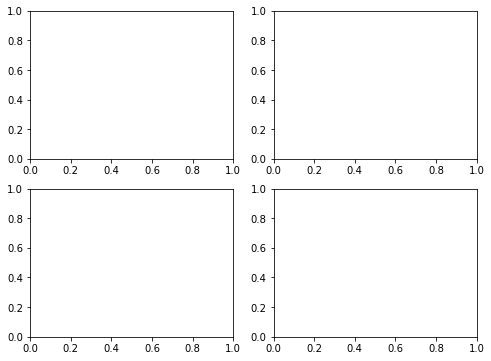

In [16]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

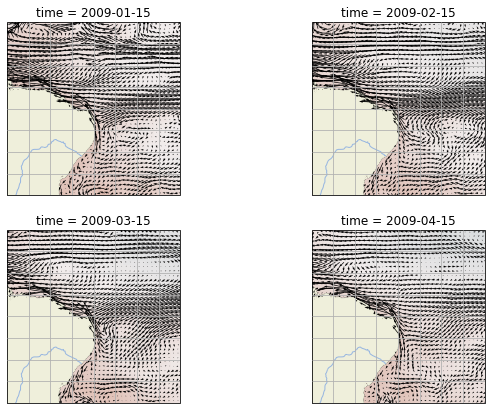

In [17]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 7),
                        subplot_kw={'projection':cp.crs.PlateCarree()},
                      )

#Primeiro plot

ax1.quiver(lon,lat,u[0,:,:],v[0,:,:],
          scale = 4,width=0.004, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=0).plot(ax = ax1,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance,add_colorbar=False)
base_mapa(ax1,grid=False)
ax1.set_extent([-45, -25, -15, 5])

#Primeiro plot

ax2.quiver(lon,lat,u[1,:,:],v[1,:,:],
          scale = 4,width=0.004, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=1).plot(ax = ax2,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance,add_colorbar=False)
base_mapa(ax2,grid=False)
ax2.set_extent([-45, -25, -15, 5])

#Primeiro plot
ax3.quiver(lon,lat,u[2,:,:],v[2,:,:],
          scale = 4,width=0.004, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=2).plot(ax = ax3,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance,add_colorbar=False)
base_mapa(ax3,grid=False)
ax3.set_extent([-45, -25, -15, 5])

#Primeiro plot
ax4.quiver(lon,lat,u[3,:,:],v[3,:,:],
          scale = 4,width=0.004, zorder = 10,
          transform=cp.crs.PlateCarree())

dado.ssh.isel(time=3).plot(ax = ax4,transform=cp.crs.PlateCarree(),
                          cmap = cm.balance,add_colorbar=False)
base_mapa(ax4,grid=False)
ax4.set_extent([-45, -25, -15, 5])

<b>Podemos fazer esse painel de forma mais rápido utilizando o **for.**

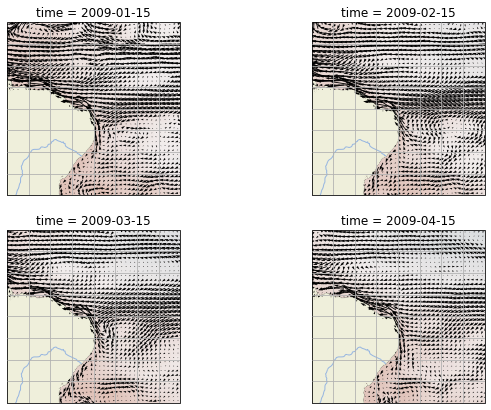

In [18]:
f, axis = plt.subplots(2, 2, figsize=(10, 7),
                        subplot_kw={'projection':cp.crs.PlateCarree()},
                        sharey=True,sharex=True
                      )

#Primeiro plot
for i,ax in enumerate(axis.ravel()):
    
    ax.quiver(lon,lat,u[i,:,:],v[i,:,:],
                  scale = 5,width=0.005, zorder = 10,
                  transform=cp.crs.PlateCarree())

    dado.ssh.isel(time=i).plot(ax = ax,transform=cp.crs.PlateCarree(),
                                  cmap = cm.balance,add_colorbar=False)
    base_mapa(ax,grid=False)
    ax.set_extent([-45, -25, -15, 5])

Dada a natureza do nosso plot(quiver), teremos um pouco de dificuldade de realizar uma boa visualização dos dados na forma de painel. Teste o plot que fizemos hoje para as outras váriaveis, tente fazer subplots com mais linhas ou coluna. 

---

<img  style=" width: 75px; height:85%; width: 25%" src="https://raw.githubusercontent.com/calixtops/ES/main/img/logo_OEPY.png">